#  Project 2 - NHL Data Analysis
create a Python script to perform a sentiment analysis of the Twitter activity of NHL hockeyteam for season 2017-18.

In [1]:
# tweepy, pandas, matplotlib, and VADER Dependencies
# Dependencies
%matplotlib inline
import tweepy
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cbook

from pymongo import MongoClient
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret


In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
# Setup Mongo Database
client = MongoClient('localhost', 27017)
db = client['nhl-database']
collection = db['TWITTER']
collection.drop()

In [13]:
# Pull 100 Tweets sent out by the following NHL Teams
hockey_teams=['@AnaheimDucks','@ArizonaCoyotes','@NHLBruins','@BuffaloSabres','@NHLFlames','@NHLCanes',
             '@NHLBlackhawks','@Avalanche','@BlueJacketsNHL', '@DallasStars', '@DetroitRedWings',
             '@EdmontonOilers','@FlaPanthers','@LAKings','@mnwild','@CanadiensMTL','@PredsNHL','@NJDevils',
              '@NY_IslandersNHL','@NYRangers','@Senators','@NHLFlyers','@penguins','@SanJoseSharks', '@StLouisBlues',
              '@TBLightning','@MapleLeafs','@Canucks', '@GoldenKnights','@Capitals','@NHLJets'
             ]



# Variables for holding sentiments
hockey_sentiments = []

# Loop through each network
for hockey_team in hockey_teams:
   
    # Counter
    team_counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        hockey_tweets = api.user_timeline(hockey_team,page=x)
        # Loop through all tweets
        for tweet in hockey_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
       
            # Add sentiments for each tweet into a list
            hockey_sentiments ={"hockey_team": hockey_team,
                               "created_at": tweet["created_at"], 
                               "compound": compound,
                               "positive": pos,
                               "negative": neu,
                               "neutral": neg,
                               "text": tweet["text"],
                               "team_counter": team_counter}
            collection.insert_one(hockey_sentiments)
            # hockey team counter,
            team_counter += 1


{'_id': ObjectId('5c0b183ee81294037cfdde4d'), 'hockey_team': '@AnaheimDucks', 'created_at': 'Sat Dec 08 00:46:58 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'The hottest team in the @NHL hits the ice again tonight!\n\nGrab tickets to this game - and the rest of the homestand… https://t.co/w3Dhq64wUr', 'team_counter': 1}
{'_id': ObjectId('5c0b183fe81294037cfdde4e'), 'hockey_team': '@AnaheimDucks', 'created_at': 'Fri Dec 07 23:27:32 +0000 2018', 'compound': 0.4201, 'positive': 0.117, 'negative': 0.883, 'neutral': 0.0, 'text': '"It\'ll be more like reflection. If and when it happens, it can be a reflection point. It\'s more of a check point. R… https://t.co/rUK8ZesOYO', 'team_counter': 2}
{'_id': ObjectId('5c0b183fe81294037cfdde4f'), 'hockey_team': '@AnaheimDucks', 'created_at': 'Fri Dec 07 23:17:21 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': "@Zdam0301 Here's the link to buy tickets for the game: http

{'_id': ObjectId('5c0b184be81294037cfde09f'), 'hockey_team': '@NHLCanes', 'created_at': 'Mon Dec 03 04:28:07 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': '@loveandhydrogen @andidee15 this is correct and how you get a doctorate', 'team_counter': 95}
{'_id': ObjectId('5c0b184be81294037cfde0a0'), 'hockey_team': '@NHLCanes', 'created_at': 'Mon Dec 03 04:22:32 +0000 2018', 'compound': -0.296, 'positive': 0.0, 'negative': 0.694, 'neutral': 0.306, 'text': 'Lots of action, no goals https://t.co/7kB3OfyE3z', 'team_counter': 96}
{'_id': ObjectId('5c0b184be81294037cfde0a1'), 'hockey_team': '@NHLCanes', 'created_at': 'Mon Dec 03 04:11:43 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': "Flashin' the leather and breakin' hearts https://t.co/1v4deoEKvp", 'team_counter': 97}
{'_id': ObjectId('5c0b184be81294037cfde0a2'), 'hockey_team': '@NHLCanes', 'created_at': 'Mon Dec 03 04:01:55 +0000 2018', 'compound': 0.0, 'positiv

{'_id': ObjectId('5c0b1855e81294037cfde293'), 'hockey_team': '@DetroitRedWings', 'created_at': 'Fri Dec 07 00:14:57 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': '1-0, Toronto.', 'team_counter': 95}
{'_id': ObjectId('5c0b1855e81294037cfde294'), 'hockey_team': '@DetroitRedWings', 'created_at': 'Fri Dec 07 00:08:24 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'GAME ON! #LGRW https://t.co/16wbuwy0Vh', 'team_counter': 96}
{'_id': ObjectId('5c0b1855e81294037cfde295'), 'hockey_team': '@DetroitRedWings', 'created_at': 'Fri Dec 07 00:07:55 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': "#Hockeytown showin' up in Toronto! #LGRW https://t.co/8fFiEgb3lA", 'team_counter': 97}
{'_id': ObjectId('5c0b1855e81294037cfde296'), 'hockey_team': '@DetroitRedWings', 'created_at': 'Fri Dec 07 00:03:04 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text

{'_id': ObjectId('5c0b1860e81294037cfde486'), 'hockey_team': '@CanadiensMTL', 'created_at': 'Thu Dec 06 23:30:00 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'C’est l’heure de #1erbutCH avec @McDoCanada ! #McBut \nhttps://t.co/2vkVzjvkJa #GoHabsGo https://t.co/lM3F1sQien', 'team_counter': 94}
{'_id': ObjectId('5c0b1860e81294037cfde487'), 'hockey_team': '@CanadiensMTL', 'created_at': 'Thu Dec 06 23:30:00 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'Time for #1stHabsGoal with @McDoCanada ! #McGoal\nhttps://t.co/8akmUA0ek6 #GoHabsGo https://t.co/OIu6ZvVAXk', 'team_counter': 95}
{'_id': ObjectId('5c0b1860e81294037cfde488'), 'hockey_team': '@CanadiensMTL', 'created_at': 'Thu Dec 06 22:25:47 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'Les gars sont dans la place.\n\nThe boys are in the building. 👔\n\n#GoHabsGo https://t.co/ZZPLO3JtYf', 'team_counter': 96}
{'_id'

{'_id': ObjectId('5c0b186ae81294037cfde67a'), 'hockey_team': '@Senators', 'created_at': 'Tue Dec 04 15:36:12 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'Communiqué : Le concours Les habiletés des #Sens, présenté par @SportChek, sera de retour au @CdnTireCtr le 3 janvi… https://t.co/ofzlDiAWzS', 'team_counter': 94}
{'_id': ObjectId('5c0b186ae81294037cfde67b'), 'hockey_team': '@Senators', 'created_at': 'Tue Dec 04 15:32:43 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'News Release: #Sens Skills, presented by @SportChek, returns to @CdnTireCtr on Jan. 3: https://t.co/MFylS49XQx', 'team_counter': 95}
{'_id': ObjectId('5c0b186ae81294037cfde67c'), 'hockey_team': '@Senators', 'created_at': 'Tue Dec 04 15:07:00 +0000 2018', 'compound': 0.9215, 'positive': 0.504, 'negative': 0.496, 'neutral': 0.0, 'text': 'Make your three predictions in the #NHLHatTrickChallenge for your chance to win some great prizes!\n\nV

{'_id': ObjectId('5c0b1875e81294037cfde86d'), 'hockey_team': '@TBLightning', 'created_at': 'Thu Dec 06 19:52:00 +0000 2018', 'compound': 0.8316, 'positive': 0.329, 'negative': 0.671, 'neutral': 0.0, 'text': '"We take a lot of pride in trying to keep our goals against down and certainly when it goes well you feel good. To… https://t.co/PCZVKanU65', 'team_counter': 93}
{'_id': ObjectId('5c0b1875e81294037cfde86e'), 'hockey_team': '@TBLightning', 'created_at': 'Thu Dec 06 19:47:00 +0000 2018', 'compound': 0.4939, 'positive': 0.138, 'negative': 0.862, 'neutral': 0.0, 'text': 'On Boston: "You look at the standings, too, they\'re pretty close to us. It\'s always divisional games that are impor… https://t.co/iGG1Ydbf6T', 'team_counter': 94}
{'_id': ObjectId('5c0b1875e81294037cfde86f'), 'hockey_team': '@TBLightning', 'created_at': 'Thu Dec 06 19:42:00 +0000 2018', 'compound': 0.5106, 'positive': 0.142, 'negative': 0.858, 'neutral': 0.0, 'text': '"The thing is, as a group, they just believe that

{'_id': ObjectId('5c0b187fe81294037cfdea61'), 'hockey_team': '@NHLJets', 'created_at': 'Wed Dec 05 00:52:39 +0000 2018', 'compound': 0.6808, 'positive': 0.272, 'negative': 0.728, 'neutral': 0.0, 'text': '🎥 True North Sports + Entertainment Chairman and Winnipeg Jets Governor Mark Chipman speaks on the Seattle expansio… https://t.co/UK0R1xSVzz', 'team_counter': 93}
{'_id': ObjectId('5c0b187fe81294037cfdea62'), 'hockey_team': '@NHLJets', 'created_at': 'Wed Dec 05 00:41:52 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': 'Scoreless after 20.\n\n#GoJetsGo | #WPGvsNYI https://t.co/aMg2aYcQ7I', 'team_counter': 94}
{'_id': ObjectId('5c0b187fe81294037cfdea63'), 'hockey_team': '@NHLJets', 'created_at': 'Wed Dec 05 00:25:21 +0000 2018', 'compound': 0.0, 'positive': 0.0, 'negative': 1.0, 'neutral': 0.0, 'text': "Isles' Mayfield called for Tripping... #NHLJets head to the @Bell_MTS Powerplay!\n\n#GoJetsGo | #WPGvsNYI https://t.co/1BULZAQarB", 'team_counter': 

In [14]:
# Unparsed DataFrame of hockey sentiments
hockey_sentiments_df = pd.DataFrame(list(collection.find({})))
#hockey_sentiments_df = pd.DataFrame(list(collection.find({}, {'_id':False})))
hockey_sentiments_df.head()

,_id,compound,created_at,hockey_team,negative,neutral,positive,team_counter,text
0,5c0b183ee81294037cfdde4d,0.0000,Sat Dec 08 00:46:58 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,1,The hottest team in the @NHL hits the ice agai...
1,5c0b183fe81294037cfdde4e,0.4201,Fri Dec 07 23:27:32 +0000 2018,@AnaheimDucks,0.883,0.0,0.117,2,"""It'll be more like reflection. If and when it..."
2,5c0b183fe81294037cfdde4f,0.0000,Fri Dec 07 23:17:21 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,3,@Zdam0301 Here's the link to buy tickets for t...
3,5c0b183fe81294037cfdde50,0.4003,Fri Dec 07 22:26:21 +0000 2018,@AnaheimDucks,0.886,0.0,0.114,4,The first outdoor @NHL game ever played in Cal...
4,5c0b183fe81294037cfdde51,0.0000,Fri Dec 07 20:31:13 +0000 2018,@AnaheimDucks,1.000,0.0,0.000,5,Four players to choose from for tonight's @Toy...


In [42]:
# Setup Mongo Database
client = MongoClient('localhost', 27017)
db = client['nhl-database']
collection2 = db['TWITTER_SENTIMENT']
collection2.drop()

In [46]:
nhl_teams=['AnaheimDucks','ArizonaCoyotes','NHLBruins','BuffaloSabres','NHLFlames','NHLCanes',
             'NHLBlackhawks','Avalanche','BlueJacketsNHL', 'DallasStars', 'DetroitRedWings',
             'EdmontonOilers','FlaPanthers','LAKings','mnwild','CanadiensMTL','PredsNHL','NJDevils',
              'NY_IslandersNHL','NYRangers','Senators','NHLFlyers','penguins','SanJoseSharks', 'StLouisBlues',
              'TBLightning','MapleLeafs','Canucks', 'GoldenKnights','Capitals','NHLJets'
             ]
# Create dictionary to hold text and label entities
twitter_dict = {"compound": [],
                "positive": [],"negative": [],"neutral": []
                }
# Create list
twitter_stats = []

average_compound_score = round(hockey_sentiments_df.groupby('hockey_team')['compound'].mean(),3)
average_positive_score = round(hockey_sentiments_df.groupby('hockey_team')['positive'].mean(),3)
average_negative_score = round(hockey_sentiments_df.groupby('hockey_team')['negative'].mean(),3)
average_neutral_score = round(hockey_sentiments_df.groupby('hockey_team')['neutral'].mean(),3)


twitter_stats = {"Hockey Team": nhl_teams,
                "Average Compound Score": average_compound_score,
                "Average Positive Score": average_positive_score ,
                "Average Neutral Score": average_neutral_score,
                "Average Negative Score": average_negative_score
                }

team_sentiment_df= pd.DataFrame(twitter_stats)
team_sentiment_df.head()
#    twitter_dict["compound"].append(average_compound_score)
#    twitter_dict["positive"].append(average_positive_score)
#    twitter_dict["negative"].append(average_negative_score)
#    twitter_dict["neutral"].append(average_neutral_score)
    


,Hockey Team,Average Compound Score,Average Positive Score,Average Neutral Score,Average Negative Score
hockey_team,,,,,
@AnaheimDucks,AnaheimDucks,0.248,0.129,0.028,0.842
@ArizonaCoyotes,ArizonaCoyotes,0.200,0.128,0.018,0.854
@Avalanche,NHLBruins,0.161,0.136,0.027,0.837
@BlueJacketsNHL,BuffaloSabres,0.139,0.100,0.024,0.876
@BuffaloSabres,NHLFlames,0.142,0.095,0.037,0.868


In [48]:
data = team_sentiment_df.to_dict(orient='records')

collection2.insert_many(data)

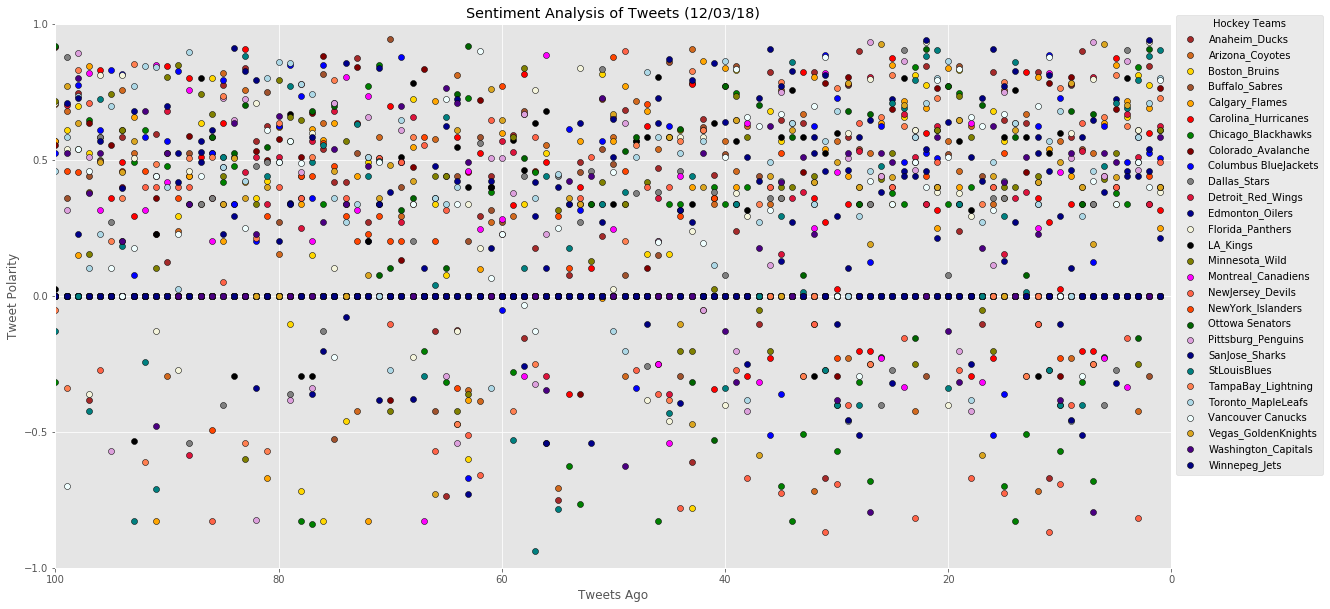

<Figure size 432x288 with 0 Axes>

In [9]:
# Scatter chart Sentiment Analysis of Media Tweets(mm/dd/yy)
# Each plot point will reflect the COMPOUND sentiment each tweet per network.
# Sort each plot point by its relative timestamp.
plt.figure(figsize=(20,10))
style.use('ggplot')
    
#  @AnaheimDucks scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@AnaheimDucks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@AnaheimDucks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="brown", label="Anaheim_Ducks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @ArizonaCoyotes scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@ArizonaCoyotes']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@ArizonaCoyotes']
plt.scatter(x_axis, y_axis, marker="o", facecolors="chocolate", label="Arizona_Coyotes", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @ NHLBruins scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLBruins']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLBruins']
plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", label="Boston_Bruins", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @BuffaloSabres  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@BuffaloSabres']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@BuffaloSabres']
plt.scatter(x_axis, y_axis, marker="o", facecolors="sienna", label="Buffalo_Sabres", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @NHLFlames  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLFlames']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLFlames']
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", label="Calgary_Flames", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @NHLCanes  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLCanes']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLCanes']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", label="Carolina_Hurricanes", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @NHLBlackhawks  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLBlackhawks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLBlackhawks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", label="Chicago_Blackhawks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @Avalanche  scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Avalanche']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Avalanche']
plt.scatter(x_axis, y_axis, marker="o", facecolors="maroon", label="Colorado_Avalanche", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @BlueJacketsNHL scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@BlueJacketsNHL']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@BlueJacketsNHL']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", label="Columbus BlueJackets", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @DallasStars scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@DallasStars']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@DallasStars']
plt.scatter(x_axis, y_axis, marker="o", facecolors="grey", label="Dallas_Stars", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @DetroitRedWings scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@DetroitRedWings']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@DetroitRedWings']
plt.scatter(x_axis, y_axis, marker="o", facecolors="crimson", label="Detroit_Red_Wings", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @EdmontonOilers scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@EdmontonOilers']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@EdmontonOilers']
plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue", label="Edmonton_Oilers", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @FlaPanthers scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@FlaPanthers']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@FlaPanthers']
plt.scatter(x_axis, y_axis, marker="o", facecolors="beige", label="Florida_Panthers", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @LAKings scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@LAKings']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@LAKings']
plt.scatter(x_axis, y_axis, marker="o", facecolors="black", label="LA_Kings", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @mnwild scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@mnwild']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@mnwild']
plt.scatter(x_axis, y_axis, marker="o", facecolors="olive", label="Minnesota_Wild", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @CanadiensMTL scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@CanadiensMTL']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@CanadiensMTL']
plt.scatter(x_axis, y_axis, marker="o", facecolors="magenta", label="Montreal_Canadiens", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @NJDevils scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NJDevils']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NJDevils']
plt.scatter(x_axis, y_axis, marker="o", facecolors="tomato", label="NewJersey_Devils", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @NY_IslandersNHL scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NY_IslandersNHL']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NY_IslandersNHL']
plt.scatter(x_axis, y_axis, marker="o", facecolors="orangered", label="NewYork_Islanders", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @Senators scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Senators']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Senators']
plt.scatter(x_axis, y_axis, marker="o", facecolors="darkgreen", label="Ottowa Senators", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @penguins scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@penguins']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@penguins']
plt.scatter(x_axis, y_axis, marker="o", facecolors="plum", label="Pittsburg_Penguins", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @SanJoseSharks scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@SanJoseSharks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@SanJoseSharks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="navy", label="SanJose_Sharks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @StLouisBlues scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@StLouisBlues']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@StLouisBlues']
plt.scatter(x_axis, y_axis, marker="o", facecolors="teal", label="StLouisBlues", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @TBLightning scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@TBLightning']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@TBLightning']
plt.scatter(x_axis, y_axis, marker="o", facecolors="coral", label="TampaBay_Lightning", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

#  @MapleLeafs scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@MapleLeafs']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@MapleLeafs']
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", label="Toronto_MapleLeafs", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @Canucks scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Canucks']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Canucks']
plt.scatter(x_axis, y_axis, marker="o", facecolors="azure", label="Vancouver Canucks", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @GoldenKnights scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@GoldenKnights']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@GoldenKnights']
plt.scatter(x_axis, y_axis, marker="o", facecolors="goldenrod", label="Vegas_GoldenKnights", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @Capitals scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@Capitals']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@Capitals']
plt.scatter(x_axis, y_axis, marker="o", facecolors="indigo", label="Washington_Capitals", edgecolors="black",
            linewidth=0.5, alpha=0.9999)


#  @NHLJets scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Hockey Team"]== '@NHLJets']
y_axis = sentiments_df["Compound"][sentiments_df["Hockey Team"] == '@NHLJets']
plt.scatter(x_axis, y_axis, marker="o", facecolors="navy", label="Winnepeg_Jets", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Tweets ({now})") 
plt.legend(title="Hockey Teams",bbox_to_anchor=(.9,.9),bbox_transform=plt.gcf().transFigure)
plt.xlim(100,0)
plt.ylim(-1.0,1.0)
plt.yticks([-1,-0.5,0,0.5,1])
plt.grid(which='major', color='white')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Output/hockey_team_sentiment_scatter.png")

plt.show()
plt.tight_layout()

<Figure size 5760x4320 with 0 Axes>

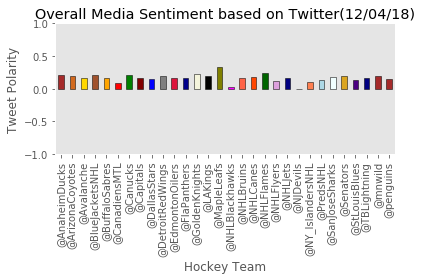

In [17]:
# Overall Media Sentiment based on Twitter(mm/dd/yy)
# x-axis - news network
# y-axis - Tweety polarity (-.20-.05)
plt.figure(figsize=(80,60))

vader_network_results_df.plot('Hockey Team', 'Average Compound Score', linewidth= .5, kind='bar',
                               color=['brown','chocolate','gold','sienna','orange','red',
                                     'green', 'maroon','blue','grey','crimson','darkblue',
                                     'beige','black','olive','magenta','tomato','orangered',
                                     'darkgreen','plum','navy','teal','coral','lightblue',
                                     'azure','goldenrod','indigo','navy'
                                    ],
                              legend=False,
                              edgecolor="black", alpha=0.9999)
# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Overall Media Sentiment based on Twitter({now})") 
#plt.ylim(-.20,.05)
plt.ylim(-1.0,1.0)
plt.yticks([-1,-0.5,0,0.5,1])
#plt.yticks([-0.20,-0.15,-.10,-0.05,0.00,0.05])
plt.grid(which='major')
plt.ylabel("Tweet Polarity")

# Save chart to png
plt.savefig("Output/sentiment_bar.png")

plt.tight_layout()
plt.show()